# Neighborhoods in Toronto - part 3
- Get Venues for each neighborhood in Toronto.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

from sklearn.cluster import KMeans

### Load the geographical coordinates of neighborhoods from part 2 

In [2]:
toronto_coords = pd.read_csv('Toronto_coordinates.csv')
toronto_coords.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### Use geopy library to get the latitude and longitude values of Toronto City

In [3]:
from geopy.geocoders import Nominatim

address = 'Toronto Canada'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(f'The geograpical coordinate of Toronto City are {latitude}, {longitude}.')

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [4]:
import folium

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_coords['Latitude'], toronto_coords['Longitude'],
                                           toronto_coords['Borough'], toronto_coords['Neighborhood']):
    label = f'{neighborhood}, {borough}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], 
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_toronto)


# Display the map
map_toronto

#### Remove Mississauga as it is not in Toronto

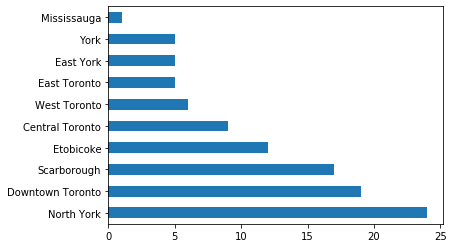

In [6]:
toronto_coords['Borough'].value_counts().plot(kind='barh')

#### Work with only boroughs that contain the word "Toronto"

In [10]:
toronto_coords['Borough'][toronto_coords['Borough'].str.contains('Toronto')].value_counts()

Downtown Toronto    19
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Borough, dtype: int64

In [11]:
borough_toronto = toronto_coords[toronto_coords['Borough'].str.contains('Toronto')].sort_values(by=['PostalCode']).reset_index(drop=True)
print(borough_toronto.shape)
borough_toronto.head()

(39, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


#### Create a map of boroughs of Toronto neighborhoods

In [12]:
import folium

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(borough_toronto['Latitude'], borough_toronto['Longitude'],
                                           borough_toronto['Borough'], borough_toronto['Neighborhood']):
    label = f'{neighborhood}, {borough}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], 
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_toronto)


# Display the map
map_toronto

In [34]:
borough_toronto.to_csv('borough_toronto.csv', index=False)

In [ ]:
borough_toronto = pd.read_csv('borough_toronto.csv')

### Use the Foursquare API to explore the neighborhoods

In [13]:
CLIENT_ID = 'C2XJXBVHYV1HFNHGDBEXEQPWLXRJA3KHJZGX53EQEPHTO5SZ' # your Foursquare ID
CLIENT_SECRET = '02LZ0P3GVPQXG4MTY53Q1NQDF4QU5AWXMRCTBSNHFPL2RFBQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C2XJXBVHYV1HFNHGDBEXEQPWLXRJA3KHJZGX53EQEPHTO5SZ
CLIENT_SECRET:02LZ0P3GVPQXG4MTY53Q1NQDF4QU5AWXMRCTBSNHFPL2RFBQ


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [14]:
borough_toronto.loc[0, 'Neighborhood']

'The Beaches'

Get the neighborhood's latitude and longitude values.

In [15]:
neighborhood_latitude = borough_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = borough_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = borough_toronto.loc[0, 'Neighborhood'] # neighborhood name

print(f'Latitude and longitude values of {neighborhood_name} are {neighborhood_latitude}, {neighborhood_longitude}.')

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


#### Let's get the top 100 venues that are within a radius of 500 meters from the first neighborhood.

In [16]:
LIMIT = 100
radius = 500

# create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=C2XJXBVHYV1HFNHGDBEXEQPWLXRJA3KHJZGX53EQEPHTO5SZ&client_secret=02LZ0P3GVPQXG4MTY53Q1NQDF4QU5AWXMRCTBSNHFPL2RFBQ&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

Send the GET request and examine the resutls

In [17]:
import requests # library to handle requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0c5cdd5bd87379b30ebf05'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

All the information is in the items key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

clean the json and structure it into a pandas dataframe.

In [19]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


And how many venues were returned by Foursquare?

In [20]:
print(f'{nearby_venues.shape[0]} venues were returned by Foursquare.')

4 venues were returned by Foursquare.


### Explore Neighborhoods in Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [21]:
# get the top 100 venues that are within a radius of 500 meters.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [22]:
toronto_venues = getNearbyVenues(names=borough_toronto['Neighborhood'],
                                   latitudes=borough_toronto['Latitude'],
                                   longitudes=borough_toronto['Longitude']
                                  )


The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [35]:
toronto_venues.to_csv('toronto_venues.csv',index=False)

In [28]:
toronto_venues = pd.read_csv('toronto_venues.csv')

#### Let's check the size of the resulting dataframe

In [29]:
print(toronto_venues.shape)
toronto_venues.head()

(1620, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
